# Emotion Detection

**Importing Libraries**

In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

c:\Users\sj992\anaconda3\envs\facial_expression\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


Tensorflow version: 2.13.0


**Exploring Dataset**

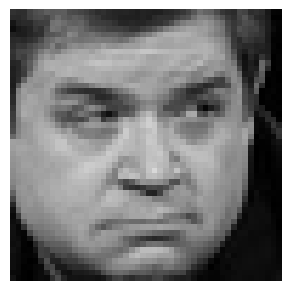

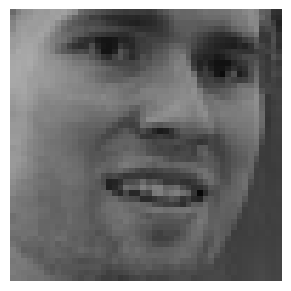

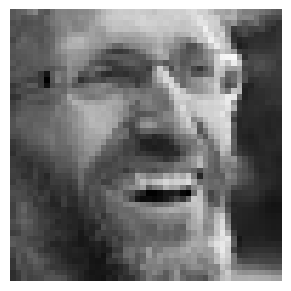

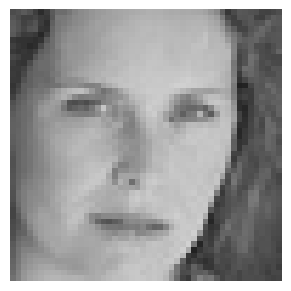

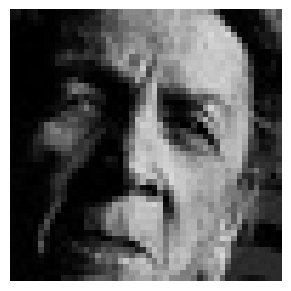

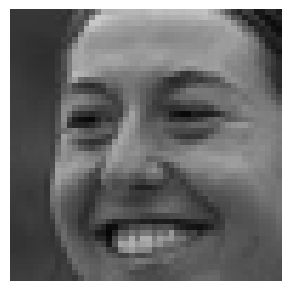

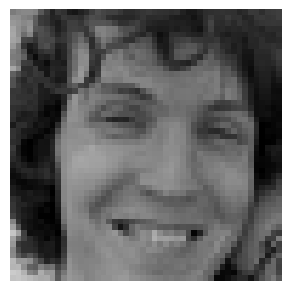

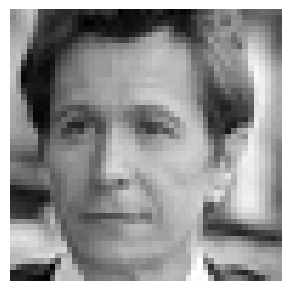

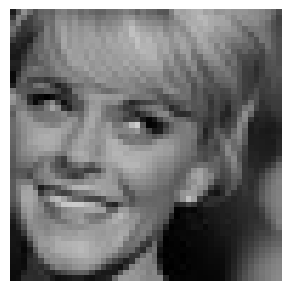

In [2]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

**Preparing Data for Training**

In [3]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**

In [4]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [5]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [6]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [7]:
model = model_fer((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0     

**Initializing the Model**

In [14]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

# Traning the Model

**The next cell takes time to complete**

In [15]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 0.7134 - accuracy: 0.7365
Epoch 1: saving model to model_weights.weights.h5
448/448 [==============================] - 196s 437ms/step - loss: 0.7134 - accuracy: 0.7365 - val_loss: 1.0742 - val_accuracy: 0.6136
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 0.6792 - accuracy: 0.7518
Epoch 2: saving model to model_weights.weights.h5
448/448 [==============================] - 100s 223ms/step - loss: 0.6792 - accuracy: 0.7518 - val_loss: 1.1196 - val_accuracy: 0.6074
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 0.6395 - accuracy: 0.7663
Epoch 3: saving model to model_weights.weights.h5
448/448 [==============================] - 107s 238ms/step - loss: 0.6395 - accuracy: 0.7663 - val_loss: 1.1475 - val_accuracy: 0.6045
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 0.6235 - accuracy: 0.7733
Epoch 4: saving model to model_weights.weights.h5
448/448 [==

**Model Evaluation**

In [16]:
model.evaluate(validation_generator)

113/113 [==============================] - 7s 61ms/step - loss: 1.2111 - accuracy: 0.6311


[1.2110675573349, 0.6310949921607971]

**Plotting Loss**

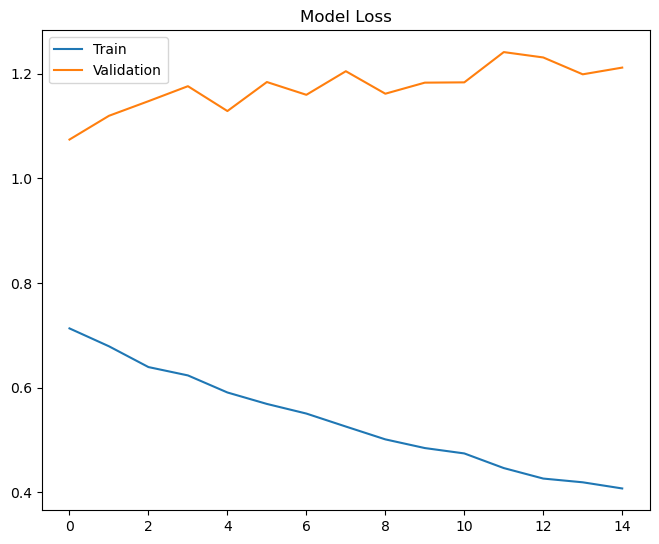

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

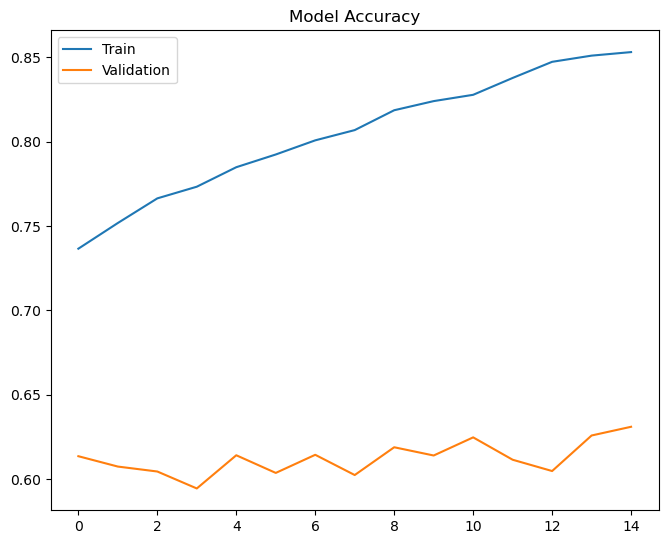

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

**Saving Model**

In [21]:
model_json = model.to_json()
with open("model_b.json","w") as json_file:
    json_file.write(model_json)

# Collecting and load preprocess

In [26]:
import cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
def resize_image(image, size=(48, 48)):
    return cv2.resize(image, size)


In [23]:
def normalize_image(image):
    return image / 255.0

In [28]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

def augment_images(images):
    return datagen.flow(images, batch_size=len(images), shuffle=False)


In [29]:
def encode_labels(labels):
    lb = LabelBinarizer()
    labels = lb.fit_transform(labels)
    return labels


In [30]:
def split_dataset(images, labels):
    X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test


In [31]:
def adjust_lighting(image, alpha=1.0, beta=0):
    new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return new_image

def prepare_final_dataset(images, labels):
    processed_images = [normalize_image(resize_image(img)) for img in images]
    augmented_images = augment_images(np.array(processed_images))
    encoded_labels = encode_labels(labels)
    X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(augmented_images, encoded_labels)
    return X_train, X_val, X_test, y_train, y_val, y_test


# Training Model

In [34]:
from tensorflow.keras.models import load_model

# Assuming you have a function create_model() to define your model architecture

# Load the pre-trained weights
model.load_weights('model_weights.weights.h5')

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Use the model for prediction or further training


In [36]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to load images from a directory
def load_images_from_folder(folder, label, img_size=(48, 48)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Directories for different contexts
cultural_dir = 'D:\Emotion_detection-main\test'
lighting_dir = 'D:\Emotion_detection-main\train'
# Add more directories as needed

# Load images and labels
cultural_images, cultural_labels = load_images_from_folder(cultural_dir, label=0)
lighting_images, lighting_labels = load_images_from_folder(lighting_dir, label=1)
# Load more datasets as needed

# Combine datasets
images = np.concatenate((cultural_images, lighting_images), axis=0)
labels = np.concatenate((cultural_labels, lighting_labels), axis=0)

# Normalize pixel values
images = images.astype('float32') / 255.0
images = np.expand_dims(images, -1)  # Add channel dimension

# One-hot encode labels
labels = pd.get_dummies(labels).to_numpy()

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Example: Displaying some augmented images
def display_augmented_images(generator, images, labels):
    for x_batch, y_batch in generator.flow(images, labels, batch_size=9):
        for i in range(0, 9):
            plt.subplot(330 + 1 + i)
            plt.imshow(x_batch[i].reshape(48, 48), cmap='gray')
        plt.show()
        break

# Display augmented images
display_augmented_images(datagen, images, labels)

# Split data into training, validation, and test sets
split_train = 0.7
split_val = 0.15
total_samples = len(images)

train_data = images[:int(total_samples * split_train)]
train_labels = labels[:int(total_samples * split_train)]
val_data = images[int(total_samples * split_train):int(total_samples * (split_train + split_val))]
val_labels = labels[int(total_samples * split_train):int(total_samples * (split_train + split_val))]
test_data = images[int(total_samples * (split_train + split_val)):]
test_labels = labels[int(total_samples * (split_train + split_val)):]

# Verify the shapes of the datasets
print(f'Training data shape: {train_data.shape}')
print(f'Validation data shape: {val_data.shape}')
print(f'Test data shape: {test_data.shape}')

# Save preprocessed data to disk for later use
np.save('train_data.npy', train_data)
np.save('train_labels.npy', train_labels)
np.save('val_data.npy', val_data)
np.save('val_labels.npy', val_labels)
np.save('test_data.npy', test_data)
np.save('test_labels.npy', test_labels)


OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: 'D:\\Emotion_detection-main\test'